# Importing libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Importing data

In [5]:
path = r'C:\Users\asicz\OneDrive\Dokumenty\CareerFoundry_Data_Analyst_Course\Data Immersion\Achievement 6'
evo_data=pd.read_csv(os.path.join(path, 'corrected_evo_data.csv'), index_col = False)

# Data cleaning

In [9]:
evo_data.columns

Index(['Genus_&_Species', 'Time', 'Location', 'Zone', 'Current_Country',
       'Habitat', 'Cranial_Capacity', 'Height', 'Incisor_Size', 'Jaw_Shape',
       'Torus_Supraorbital', 'Prognathism', 'Foramen_Mágnum_Position',
       'Canine Size', 'Canines_Shape', 'Tooth_Enamel', 'Technology',
       'Technology_type', 'Bipedalism', 'Arms', 'Feet', 'Diet',
       'Sexual_Dimorphism', 'Hip', 'Vertical_Front', 'Anatomy', 'Migrated',
       'Skeleton'],
      dtype='object')

In [11]:
evo_data.head(10)

,Genus_&_Species,Time,Location,Zone,Current_Country,Habitat,Cranial_Capacity,Height,Incisor_Size,Jaw_Shape,...,Bipedalism,Arms,Feet,Diet,Sexual_Dimorphism,Hip,Vertical_Front,Anatomy,Migrated,Skeleton
0,hominino Orrorin tugenencin,6.041124,Africa,oriental,Kenya,forest,144.51410,110.24323,small,conical,...,low probability,climbing,climbing,dry fruits,high,wide,no,old,no,light
1,hominino Ardipithecus ramidus / kabadda,4.383910,Africa,oriental,Ethiopia,mixed,293.96021,107.69018,small,conical,...,high probability,climbing,climbing,soft fruits,medium-high,wide,no,old,no,light
2,Australopithecus Afarensis,3.749413,Africa,oriental,Kenya,mixed,264.79849,123.76644,big,U shape,...,yes,climbing,walk,dry fruits,high,slim,no,old,no,refined
3,Australopithecus Anamensis,4.595606,Africa,oriental,Kenya,forest-gallery,403.28047,111.40831,big,U shape,...,yes,climbing,climbing,dry fruits,high,wide,no,mixed,no,light
4,Australopithecus Africanus,3.614060,Africa,south,South Africa,forest-gallery,679.15233,111.59004,small,conical,...,yes,climbing,climbing,dry fruits,high,wide,yes,old,no,light
5,Homo Rodhesiensis,0.679447,Africa,oriental,Ethiopia,savannah,1155.28124,144.77589,big,U shape,...,modern,manipulate with precision,walk,omnivore,medium-high,slim,yes,mixed,no,robust
6,Australopithecus Afarensis,3.788978,Africa,oriental,Kenya,mixed,305.31366,138.47796,big,U shape,...,yes,climbing,walk,dry fruits,high,slim,no,old,no,refined
7,hominino Sahelanthropus tchadensis,7.551967,Africa,central,Republic of Chad,mixed,258.04823,91.23118,small,conical,...,low probability,climbing,climbing,dry fruits,high,wide,no,old,no,light
8,Homo Neanderthalensis\n,0.547326,Europa,central,Germany,cold forest,1156.08025,158.10385,big,modern,...,modern,manipulate with precision,walk,carnivorous,medium-high,very modern,modern,very modern,no,robust
9,Australopithecus Anamensis,4.180914,Africa,oriental,Kenya,forest-gallery,460.06068,117.35674,big,U shape,...,yes,climbing,climbing,dry fruits,high,wide,no,mixed,no,light


In [13]:
evo_data.shape

(12000, 28)

In [15]:
# Check for missing values
evo_data.isnull().sum()

Genus_&_Species            0
Time                       0
Location                   0
Zone                       0
Current_Country            0
Habitat                    0
Cranial_Capacity           0
Height                     0
Incisor_Size               0
Jaw_Shape                  0
Torus_Supraorbital         0
Prognathism                0
Foramen_Mágnum_Position    0
Canine Size                0
Canines_Shape              0
Tooth_Enamel               0
Technology                 0
Technology_type            0
Bipedalism                 0
Arms                       0
Feet                       0
Diet                       0
Sexual_Dimorphism          0
Hip                        0
Vertical_Front             0
Anatomy                    0
Migrated                   0
Skeleton                   0
dtype: int64

In [17]:
# Check for duplicates
dups = evo_data.duplicated()

In [19]:
dups.shape

(12000,)

<Axes: xlabel='Cranial_Capacity', ylabel='Count'>

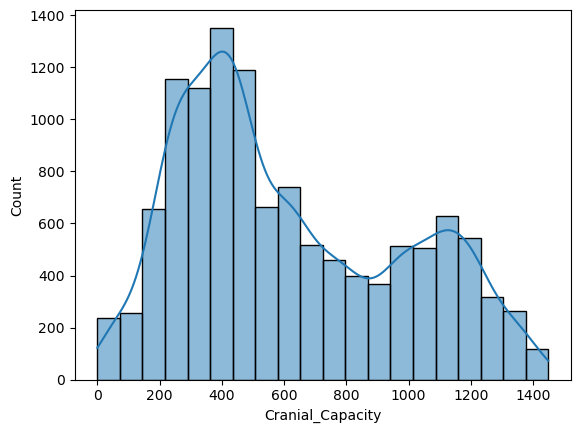

In [21]:
# Check for extreme values in Cranial Capacity
sns.histplot(evo_data['Cranial_Capacity'], bins=20, kde = True) 

In [23]:
# Check the mean
evo_data['Cranial_Capacity'].mean()

616.8243027116666

In [25]:
# Check the median
evo_data['Cranial_Capacity'].median()

511.3202

In [27]:
# Check the max
evo_data['Cranial_Capacity'].max()

1448.39747

# Preparing data for regression analysis

#### We already know form our hypothesis and the previous analyses that brain size over the evolutionary time is what we want to explore. Therefore, we will investigate the relationship between Time and Cranial Capacity.

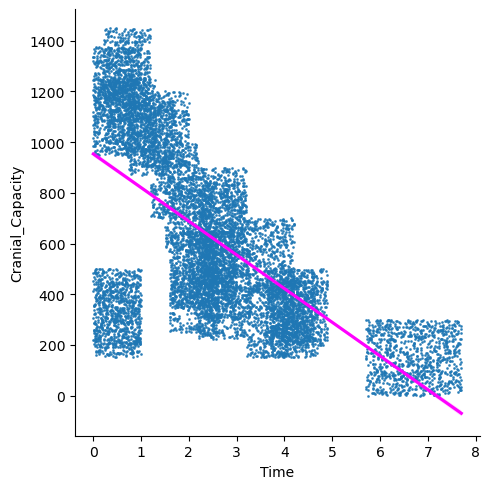

In [31]:
# Create a scatterplot of Cranial Capacity (cm^3) & Time
sns.lmplot(x='Time', y='Cranial_Capacity', data=evo_data, 
           scatter_kws={'s': 1}, 
           line_kws={'color': 'magenta'})

In [39]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = evo_data['Time'].values.reshape(-1,1)
y = evo_data['Cranial_Capacity'].values.reshape(-1,1)

In [41]:
X

array([[6.04112375],
       [4.38390951],
       [3.74941258],
       ...,
       [0.21385699],
       [2.85918606],
       [2.23709819]])

In [43]:
y

array([[144.5141 ],
       [293.96021],
       [264.79849],
       ...,
       [222.9113 ],
       [466.86762],
       [626.73209]])

In [45]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression analysis

In [48]:
# Create a regression object.
regression = LinearRegression()

In [50]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [52]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

Text(0, 0.5, 'Cranial Capacity')

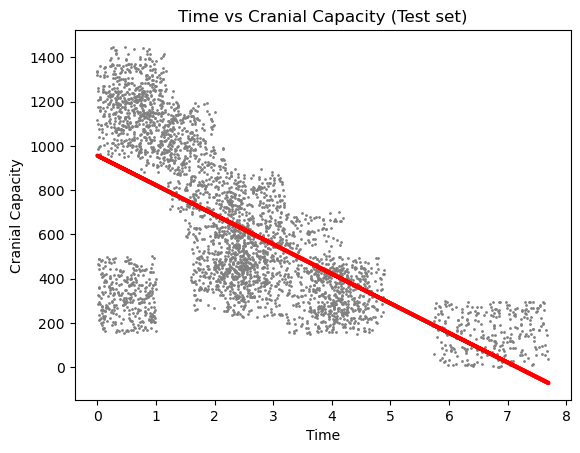

In [54]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 1)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Time vs Cranial Capacity (Test set)')
plot_test.xlabel('Time')
plot_test.ylabel('Cranial Capacity')

In [56]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [58]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-133.5646148]]
Mean squared error:  74240.72046284746
R2 score:  0.41793076198185786


In [60]:
y_predicted

array([[660.60826451],
       [657.06903462],
       [908.78205339],
       ...,
       [633.709839  ],
       [839.64658457],
       [585.98875682]])

In [62]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,877.56632,660.608265
1,626.73209,657.069035
2,1047.26565,908.782053
3,928.04849,761.351789
4,1241.72572,913.795576
5,438.70498,453.949256
6,1170.14700,809.816517
7,411.53125,469.288534
8,376.03490,400.518362
9,912.46593,818.914753


#### The regression results show a very high mean squared error and weak correlation for Time and Cranial Capacity.

#### Check for overfitting

In [65]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [67]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [69]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-133.5646148]]
Mean squared error:  69888.31426069085
R2 score:  0.4481003963695779


Text(0, 0.5, 'Cranial Capacity')

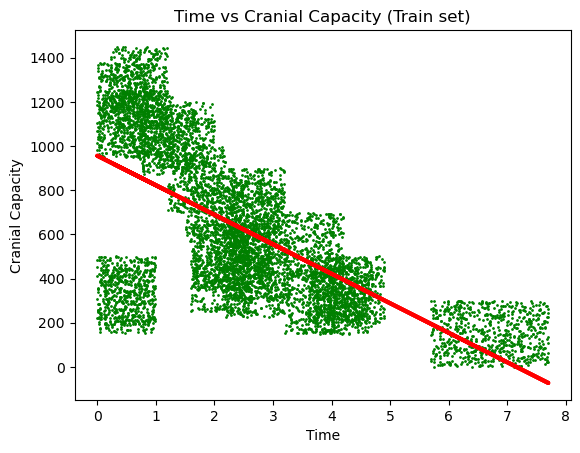

In [71]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 1)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Time vs Cranial Capacity (Train set)')
plot_test.xlabel('Time')
plot_test.ylabel('Cranial Capacity')

#### We can see a clear outlier group in the recent evolutionary past where a certain group of hominins displayed a very low cranial volume. We can explore it and remove it from the data and check the relationships in the data set again.

In [84]:
# Extract outliers from the analysis
outliers = evo_data[(evo_data['Time'] < 1.2) & (evo_data['Cranial_Capacity'] < 600)]

# Display the 'Genus_&_Species' column for the outliers to find out what homimins are being part of this outgroup
print("Outliers found:")
print(outliers[['Genus_&_Species']])

# Summarize what species belong to outliers
unique_outlier_species = outliers[['Genus_&_Species']].drop_duplicates()
print("Unique Genus_&_Species for outliers:")
print(unique_outlier_species.to_string(index=False))

# Remove outliers from the dataset
evo_data_cleaned = evo_data[~((evo_data['Time'] < 1.2) & (evo_data['Cranial_Capacity'] < 600))]

# Display the cleaned dataset size
print(f"\nOriginal dataset size: {evo_data.shape[0]} rows")
print(f"Cleaned dataset size: {evo_data_cleaned.shape[0]} rows")

Outliers found:
         Genus_&_Species
13           Homo Naledi
14     Homo Floresiensis
19     Homo Floresiensis
22           Homo Naledi
28           Homo Naledi
...                  ...
11917  Homo Floresiensis
11920  Homo Floresiensis
11949  Homo Floresiensis
11982  Homo Floresiensis
11997  Homo Floresiensis

[1000 rows x 1 columns]
Unique Genus_&_Species for outliers:
  Genus_&_Species
      Homo Naledi
Homo Floresiensis

Original dataset size: 12000 rows
Cleaned dataset size: 11000 rows


#### The outlier group consists of two species: Homo Naledi & Homo Floresiensis.
#### Perhaps their brain size is so unexpectedly small because their entire body size is small?s

C:\Users\asicz\AppData\Local\Temp\ipykernel_20176\2185854466.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genus_&_Species', y='Height', data=filtered_data, palette=['gray', 'blue'])


Text(0.5, 1.0, 'Height Distribution of Homo naledi and Homo floresiensis')

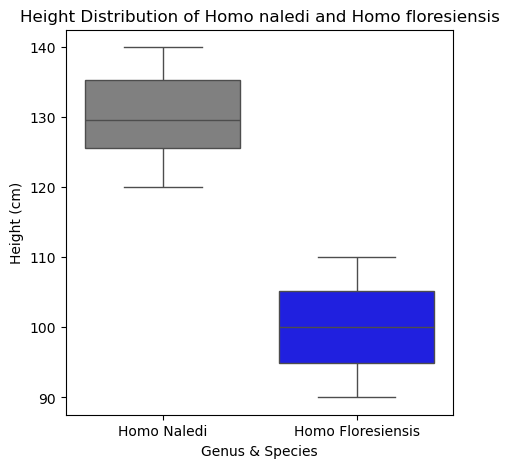

In [106]:
# Filter dataset for 'Homo Naledi' and 'Homo Floresiensis'
filtered_data = evo_data[evo_data['Genus_&_Species'].isin(['Homo Naledi', 'Homo Floresiensis'])]

# Create boxplot of Height of those species
plt.figure(figsize=(5, 5))
sns.boxplot(x='Genus_&_Species', y='Height', data=filtered_data, palette=['gray', 'blue'])

# Labels and Title
plt.xlabel('Genus & Species')
plt.ylabel('Height (cm)')
plt.title('Height Distribution of Homo naledi and Homo floresiensis')

#### We see that one of the outlier Hominins is a tiny species in general but the other one is quite taller.

Text(0.5, 1.0, 'Cranial Capacity vs Height')

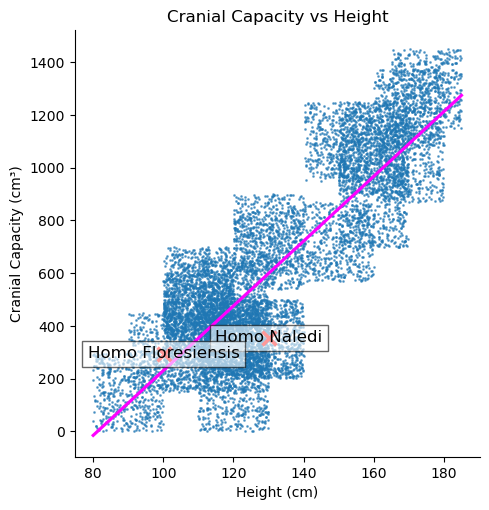

In [165]:
# Create scatter plot with Height and Cranial Capacity of the outlier species
g = sns.lmplot(x='Height', y='Cranial_Capacity', data=evo_data, 
               scatter_kws={'s': 1, 'alpha': 0.6},  # Adjust point size & transparency
               line_kws={'color': 'magenta'})

# Get the correct axis from FacetGrid
ax = g.ax  

# Define species of interest
target_species = ["Homo Naledi", "Homo Floresiensis"]

# Loop through species to label and mark centers
for species in target_species:
    species_data = evo_data[evo_data['Genus_&_Species'].str.strip() == species]
    
    if not species_data.empty:
        # Calculate cluster center (mean of Height & Cranial_Capacity)
        mean_height = species_data["Height"].mean()
        mean_capacity = species_data["Cranial_Capacity"].mean()

        # Add text label
        ax.text(mean_height, mean_capacity, species, fontsize=12, color="black", 
                ha='center', va='center', bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))

        # Add cross marker at cluster center
        ax.scatter(mean_height, mean_capacity, color='red', s=100, marker='x', linewidths=2.5, label=f"{species} center")

# Set labels and title
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Cranial Capacity (cm³)")
ax.set_title("Cranial Capacity vs Height")

#### We can visually identify both Hominin species (outliers in the Cranial Capacity over Time) with the small brain size on a scatter plot showing Cranial Capacity vs Height. 
#### It looks like Homo Floresiensis is a generally small species, while Homo Naledi falls a bit off the trend line indicating that its brain size it's a bit small for its height. This means that there might be other factors determining the smaller than expected by Time or Height brain size.

# Regression analysis without the outlier group

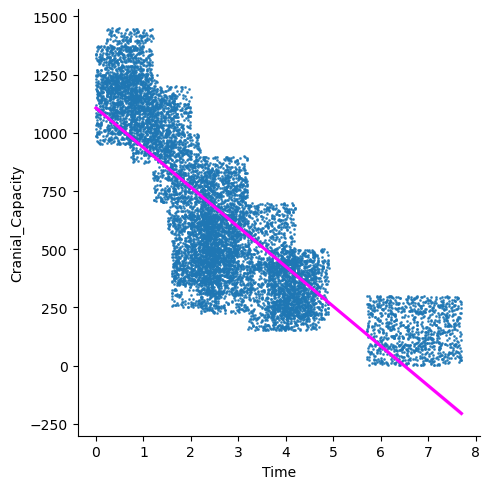

In [112]:
# See how the scatterplot looks without outliers
sns.lmplot(x='Time', y='Cranial_Capacity', data=evo_data_cleaned, 
           scatter_kws={'s': 1}, 
           line_kws={'color': 'magenta'})

In [132]:
# Reshape again
X_2 = evo_data_cleaned['Time'].values.reshape(-1,1)
y_2 = evo_data_cleaned['Cranial_Capacity'].values.reshape(-1,1)

In [134]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [136]:
# Run and fit the regression.
regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [138]:
# Predict
y_predicted_2 = regression.predict(X_test_2)

In [140]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [142]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-170.5166525]]
Mean squared error:  39655.39467932586
R2 score:  0.6811975069774936


Text(0, 0.5, 'Cranial Capacity')

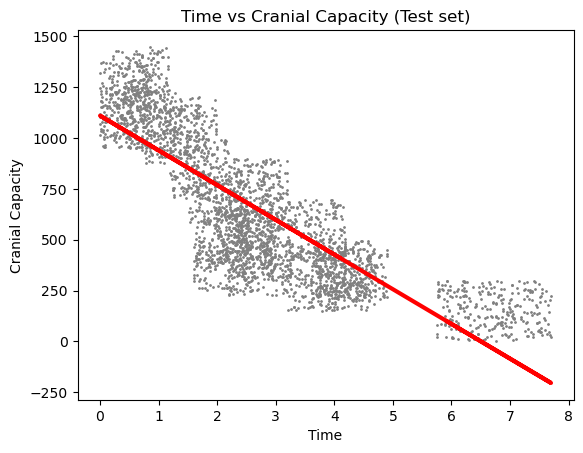

In [146]:
# Visualizing the test set results
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 1)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Time vs Cranial Capacity (Test set)')
plot_test.xlabel('Time')
plot_test.ylabel('Cranial Capacity')

In [148]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,248.06139,413.722243
1,327.90297,746.077137
2,415.32488,298.075767
3,425.63313,292.333649
4,888.80340,771.721266
5,372.79952,335.878777
6,507.96093,694.272529
7,422.35506,831.146029
8,1123.71575,1029.911539
9,579.23465,650.824047


#### This time, without the outlier group, the correlation is strongly negative, indicating that the more distant the Hominin species to present time, the smaller its brain size was.
#### By inspecting some values in the actual vs predicted values table, we can see that for some data points the difference between those two values is small, while for some it appears quite large.
#### It is possible that the relationship between Time and Cranial Capacity is not purely linear or it may also depend on other factors. We can investigate this in further analyses.